In [1]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import random

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
 
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU()
        )

        self.FC1 = nn.Linear(32, 16)
        self.FC2 = nn.Linear(32, 16)

        self.decoder = nn.Sequential(
            nn.Linear(16,128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.ReLU()
        )

    def reparameterize(self, mu, log_var):
        #log_var: log variance from the encoder's latent space
        
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.distributions.Normal(0, 1).sample(std.shape).to(device)

        sample = mu + eps*std# sampling as if coming from the input space

        return sample, std
    
    def forward(self, x):

        x = self.encoder(x)

        mean = self.FC1(x)
        log_var = self.FC2(x)
        
        sample, std = self.reparameterize(mean, log_var)
        output = self.decoder(sample)
        
        return output, mean, std

In [4]:
model=VAE().to(device)

batch_size = 64
num_epochs = 10
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [5]:
train_dataset=datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
def final_loss(x, x_recon, mu, log_std):
    BCE = criterion(x, x_recon)
    KLD = -0.5 * torch.mean(1 + log_std - torch.square(mu) - torch.exp(log_std))

    return BCE + KLD

Epoch [1/10], Step [1/938], Loss: 0.5646
Epoch [1/10], Step [101/938], Loss: 0.0888
Epoch [1/10], Step [201/938], Loss: 0.0622
Epoch [1/10], Step [301/938], Loss: 0.0550
Epoch [1/10], Step [401/938], Loss: 0.0620
Epoch [1/10], Step [501/938], Loss: 0.0603
Epoch [1/10], Step [601/938], Loss: 0.0466
Epoch [1/10], Step [701/938], Loss: 0.0433
Epoch [1/10], Step [801/938], Loss: 0.0453
Epoch [1/10], Step [901/938], Loss: 0.0447
Epoch = 1


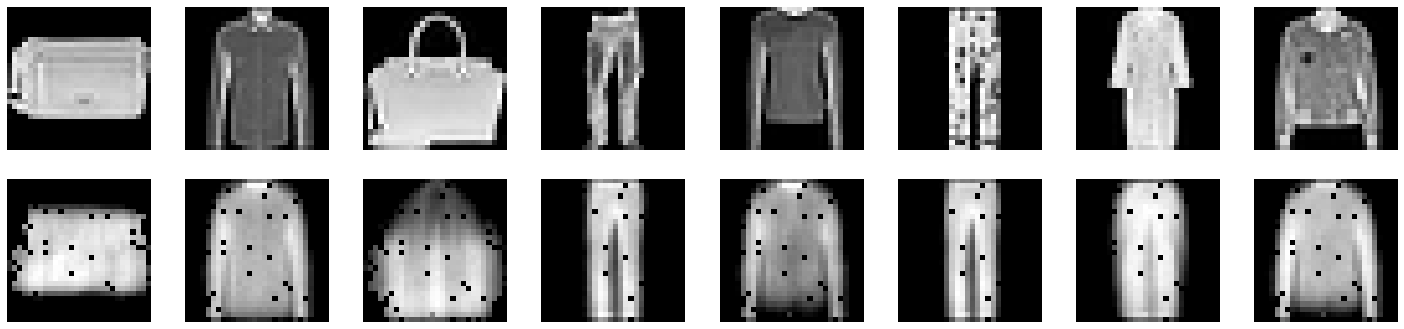

Epoch [2/10], Step [1/938], Loss: 0.0424
Epoch [2/10], Step [101/938], Loss: 0.0385
Epoch [2/10], Step [201/938], Loss: 0.0374
Epoch [2/10], Step [301/938], Loss: 0.0373
Epoch [2/10], Step [401/938], Loss: 0.0359
Epoch [2/10], Step [501/938], Loss: 0.0312
Epoch [2/10], Step [601/938], Loss: 0.0409
Epoch [2/10], Step [701/938], Loss: 0.0336
Epoch [2/10], Step [801/938], Loss: 0.0361
Epoch [2/10], Step [901/938], Loss: 0.0335
Epoch = 2


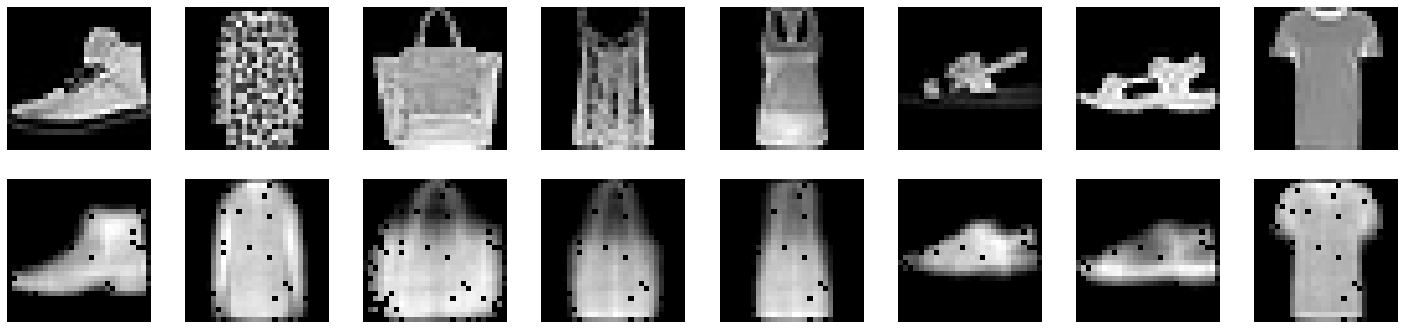

Epoch [3/10], Step [1/938], Loss: 0.0306
Epoch [3/10], Step [101/938], Loss: 0.0301
Epoch [3/10], Step [201/938], Loss: 0.0296
Epoch [3/10], Step [301/938], Loss: 0.0337
Epoch [3/10], Step [401/938], Loss: 0.0311
Epoch [3/10], Step [501/938], Loss: 0.0296
Epoch [3/10], Step [601/938], Loss: 0.0292
Epoch [3/10], Step [701/938], Loss: 0.0310
Epoch [3/10], Step [801/938], Loss: 0.0276
Epoch [3/10], Step [901/938], Loss: 0.0261
Epoch = 3


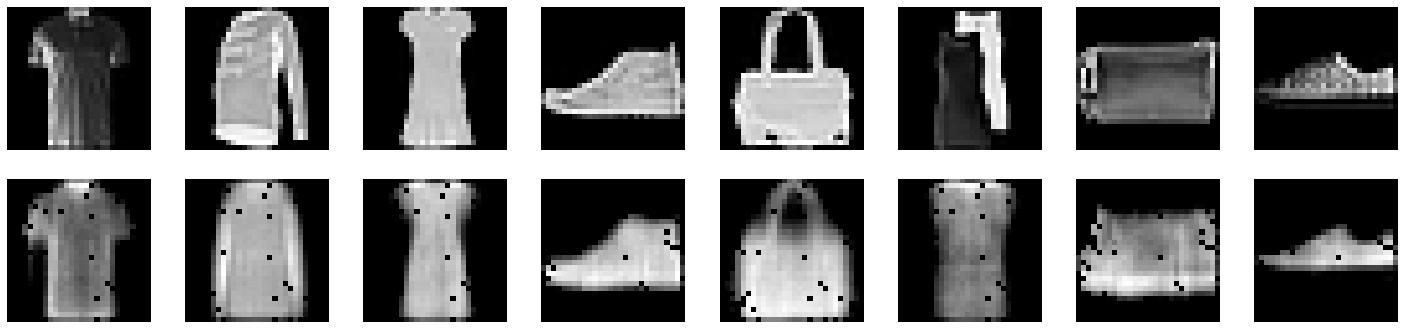

Epoch [4/10], Step [1/938], Loss: 0.0304
Epoch [4/10], Step [101/938], Loss: 0.0282
Epoch [4/10], Step [201/938], Loss: 0.0249
Epoch [4/10], Step [301/938], Loss: 0.0256
Epoch [4/10], Step [401/938], Loss: 0.0259
Epoch [4/10], Step [501/938], Loss: 0.0314
Epoch [4/10], Step [601/938], Loss: 0.0278
Epoch [4/10], Step [701/938], Loss: 0.0216
Epoch [4/10], Step [801/938], Loss: 0.0242
Epoch [4/10], Step [901/938], Loss: 0.0255
Epoch = 4


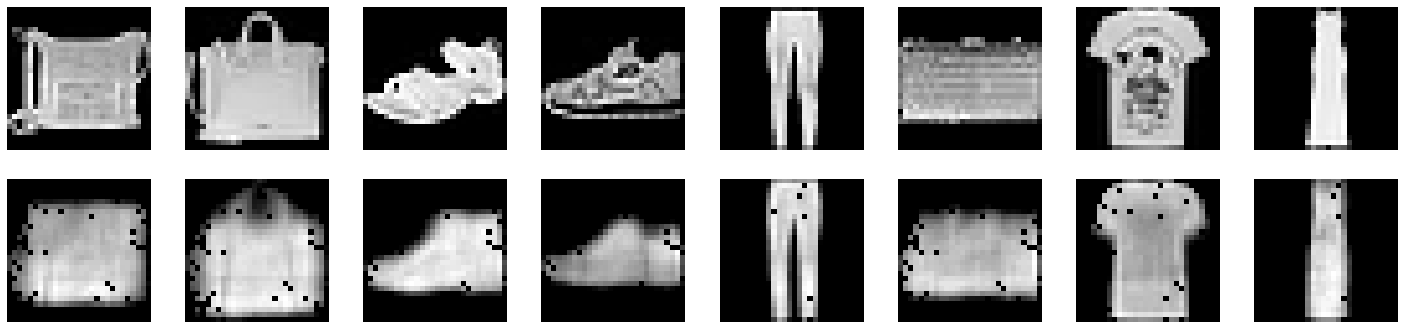

Epoch [5/10], Step [1/938], Loss: 0.0254
Epoch [5/10], Step [101/938], Loss: 0.0240
Epoch [5/10], Step [201/938], Loss: 0.0294
Epoch [5/10], Step [301/938], Loss: 0.0248
Epoch [5/10], Step [401/938], Loss: 0.0237
Epoch [5/10], Step [501/938], Loss: 0.0230
Epoch [5/10], Step [601/938], Loss: 0.0259
Epoch [5/10], Step [701/938], Loss: 0.0231
Epoch [5/10], Step [801/938], Loss: 0.0241
Epoch [5/10], Step [901/938], Loss: 0.0221
Epoch = 5


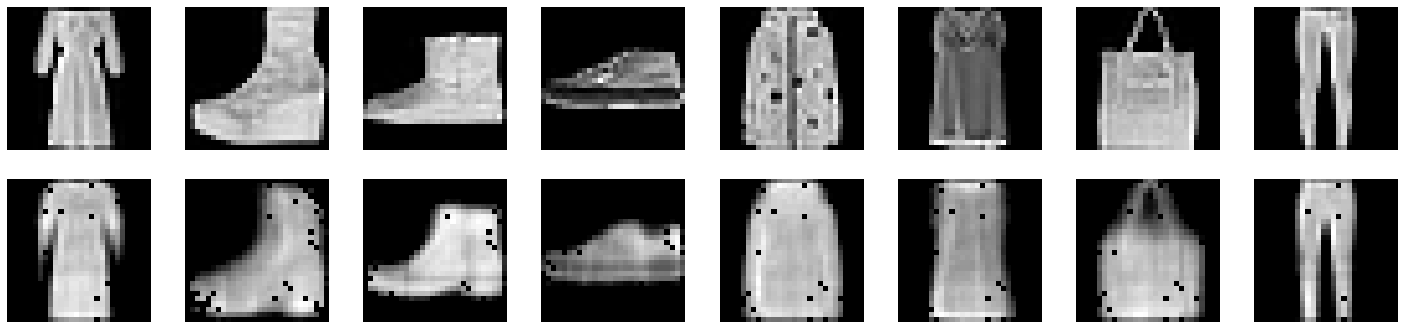

Epoch [6/10], Step [1/938], Loss: 0.0218
Epoch [6/10], Step [101/938], Loss: 0.0225
Epoch [6/10], Step [201/938], Loss: 0.0259
Epoch [6/10], Step [301/938], Loss: 0.0220
Epoch [6/10], Step [401/938], Loss: 0.0229
Epoch [6/10], Step [501/938], Loss: 0.0232
Epoch [6/10], Step [601/938], Loss: 0.0237
Epoch [6/10], Step [701/938], Loss: 0.0250
Epoch [6/10], Step [801/938], Loss: 0.0246
Epoch [6/10], Step [901/938], Loss: 0.0209
Epoch = 6


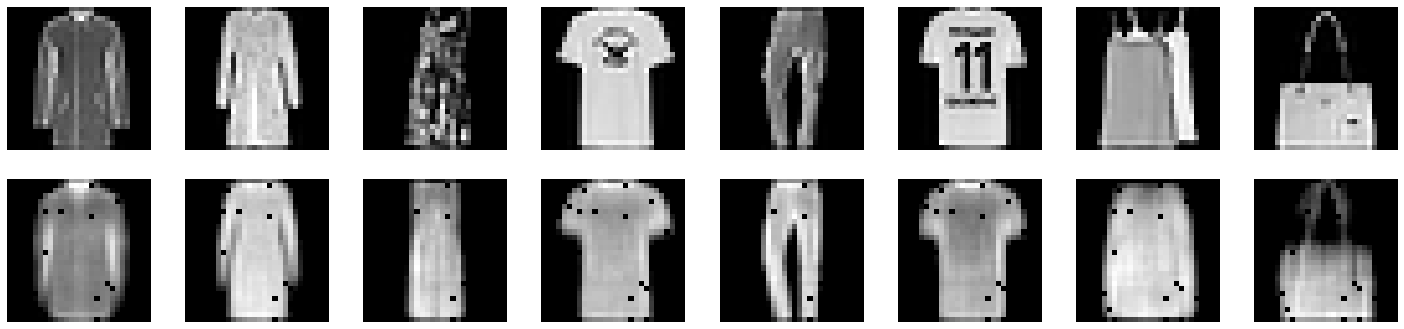

Epoch [7/10], Step [1/938], Loss: 0.0219
Epoch [7/10], Step [101/938], Loss: 0.0205
Epoch [7/10], Step [201/938], Loss: 0.0229
Epoch [7/10], Step [301/938], Loss: 0.0243
Epoch [7/10], Step [401/938], Loss: 0.0200
Epoch [7/10], Step [501/938], Loss: 0.0242
Epoch [7/10], Step [601/938], Loss: 0.0228
Epoch [7/10], Step [701/938], Loss: 0.0202
Epoch [7/10], Step [801/938], Loss: 0.0227
Epoch [7/10], Step [901/938], Loss: 0.0206
Epoch = 7


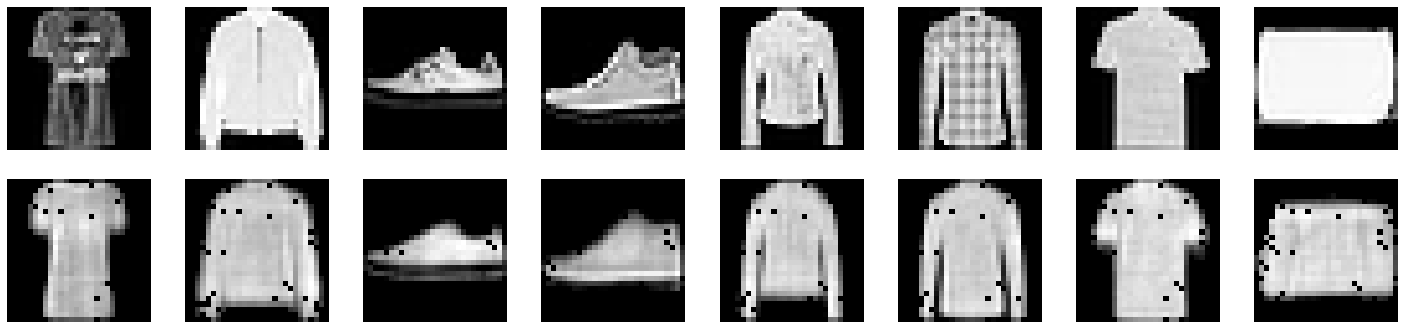

Epoch [8/10], Step [1/938], Loss: 0.0234
Epoch [8/10], Step [101/938], Loss: 0.0220
Epoch [8/10], Step [201/938], Loss: 0.0204
Epoch [8/10], Step [301/938], Loss: 0.0216
Epoch [8/10], Step [401/938], Loss: 0.0206
Epoch [8/10], Step [501/938], Loss: 0.0228
Epoch [8/10], Step [601/938], Loss: 0.0233
Epoch [8/10], Step [701/938], Loss: 0.0177
Epoch [8/10], Step [801/938], Loss: 0.0191
Epoch [8/10], Step [901/938], Loss: 0.0221
Epoch = 8


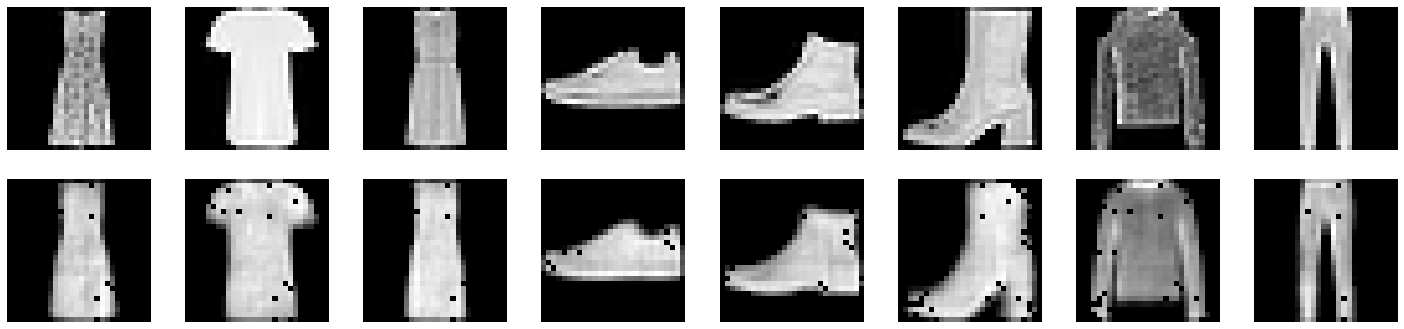

Epoch [9/10], Step [1/938], Loss: 0.0222
Epoch [9/10], Step [101/938], Loss: 0.0220
Epoch [9/10], Step [201/938], Loss: 0.0214
Epoch [9/10], Step [301/938], Loss: 0.0222
Epoch [9/10], Step [401/938], Loss: 0.0199
Epoch [9/10], Step [501/938], Loss: 0.0201
Epoch [9/10], Step [601/938], Loss: 0.0223
Epoch [9/10], Step [701/938], Loss: 0.0199
Epoch [9/10], Step [801/938], Loss: 0.0213
Epoch [9/10], Step [901/938], Loss: 0.0221
Epoch = 9


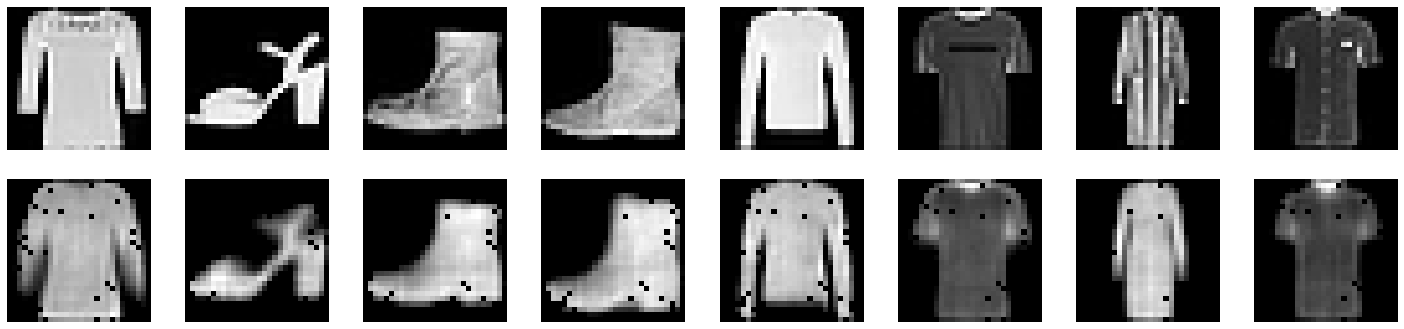

Epoch [10/10], Step [1/938], Loss: 0.0199
Epoch [10/10], Step [101/938], Loss: 0.0212
Epoch [10/10], Step [201/938], Loss: 0.0207
Epoch [10/10], Step [301/938], Loss: 0.0213
Epoch [10/10], Step [401/938], Loss: 0.0200
Epoch [10/10], Step [501/938], Loss: 0.0193
Epoch [10/10], Step [601/938], Loss: 0.0221
Epoch [10/10], Step [701/938], Loss: 0.0207
Epoch [10/10], Step [801/938], Loss: 0.0249
Epoch [10/10], Step [901/938], Loss: 0.0197
Epoch = 10


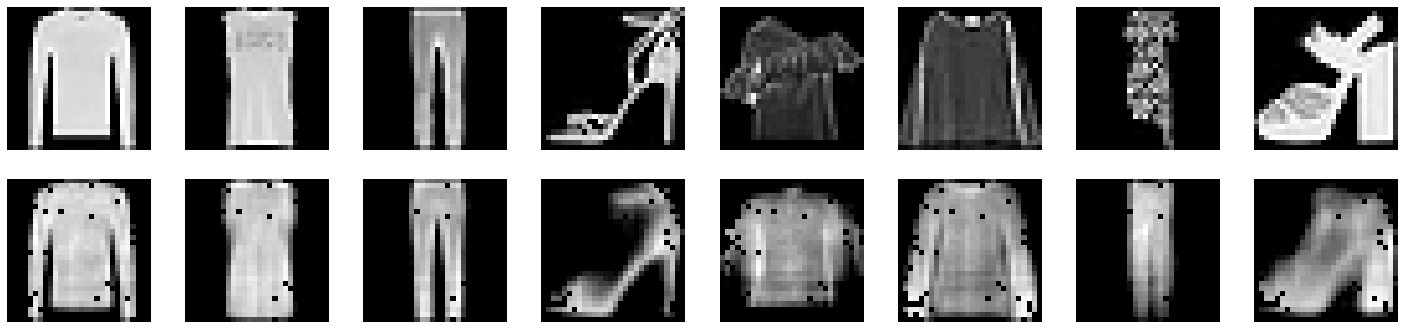

In [7]:
losses=[]
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(train_loader):
      
        x = x.reshape(-1, 784)
        x = x.to(device)
        x_recon, mu, log_std = model.forward(x)

        loss = final_loss(x, x_recon, mu, log_std)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
        losses.append(loss.item())
    # Reshaping
    x = x.reshape(-1,28,28)
    x_recon = x_recon.reshape(-1,28,28)

    #To convert cuda tensor to numpy array
    x= x.detach().cpu().numpy()
    x_recon = x_recon.detach().cpu().numpy()

    plt.figure(figsize = (25,50))
    print("Epoch = {}".format(epoch+1))
    for i in range(8):
        plt.subplot(16,8,i+1)
        plt.imshow(x[i], cmap='gray')
        plt.axis('off')

        plt.subplot(16,8,i + 9)
        plt.imshow(x_recon[i], cmap='gray')
        plt.axis('off')

    plt.show()

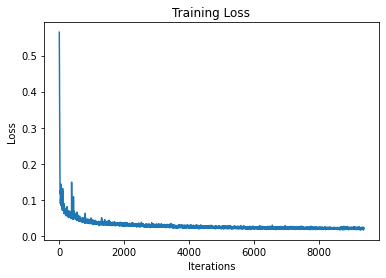

In [8]:
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[::])
plt.show()

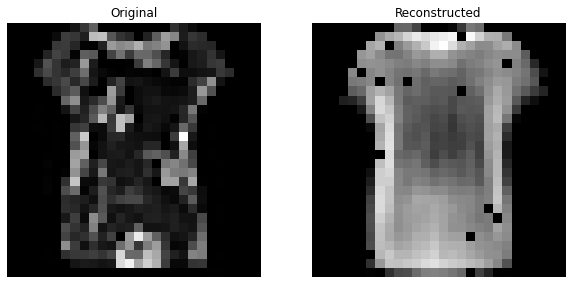

In [9]:
index= random.randint(0, len(test_dataset))

with torch.no_grad():
    data= test_dataset[index][0].view(1,1,28,28)
    data= data.reshape(-1, 784)
    data= data.to(device)
    output,_,_ = model.forward(data)
    
    data = data.detach().cpu().numpy()
    #data = data.reshape(-1, 28, 28)

    output = output.detach().cpu().numpy()
    #output = output.reshape(-1, 28, 28)

    plt.figure(figsize = (10,25))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(data[0].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Reconstructed')
    plt.imshow(output[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()